## Classifiers

***Perceptron***

The Perceptron is a very basic classifier that works by first initializing weights to small random numbers, and for each training step it computes the predicted value, then updates its weights; weights are updated based on the learning rate and the difference between the predicted value and the actual value in the training dataset. This is occurs in a stepwise fashion, such that the updated weight value pushes towards the direction of the positive or negative target class. It's biggest disadvantage is that it never converges if the classes are not perfectly linearly serperatable. IF the weights never converge, a maximum threshold for the number of tolerated misclassification prevents the algorithm from running for ever, or a defined maximum number of epochs during the training. 

Adaline is also a type of Perceptron and acts as an improved version, here weights are updated based on a linear activation function, rather than a unit step function. The activation function is the identity function of the net input. A threshold function is still used to make the final prediction. Thus, unlike the original Perceptron, Adaline compares the class labels with the lineear activation function's continuous valued output to compute error and then update the weights. The main advantage of a continuous linear activation function in contrast to unit step, is that the cost function to learn the weights becomes differentiable, meaning that we can use gradient descent (taking steps in the opposite direction of our cost function gradient) to find the weights that minimize our cost function. The weights in adaline are not incremented after each training example, rather based on all examples in the class label. This is called batch gradient descent. Other gradient descent algorithms are also viable.

***SVM***

An extension of the perceptron, but instead of minimizing the misclassification errors, in SVMS we maximize the margin. The margin is the distance between the hyperplane (decision boundary) and the training examples. The training examples are the so called support vectors. Decision boundaries with large margins have lower generalization errors. The distance between the positive and negative hyperplanes is the margin, and the objective function of the SVM is to maximize this margin while maintaining that the examples are classified correctly, where all negative class examples are on the negative side of the hyper-plane and all positive examples are on the positive hyperplane. Instead of maximizing, most classifiers minimize the reciprocal term via quadratic programming. 

SVM have the advantage of being non-linearly adaptable via the introduction of the slack variable, and a variable C that controls the penalty for misclassification, decreasing C increases bias and lowers the variance of the model. SVMs can also be easily kernelized to solve nonlinear classification problems, this is the most common SVM variant. The kernel method is essentially used to deal with non-linearly seperable data by mapping them with a mapping function to a higher dimension space where the data becomes linearly seperable. Then a linear SVM is trained, and the same mapping function is used to transform unseen data for classification. The computational expense of mapping can be circumvented via the kernel-trick. It also introduces itself to a slew of other hyperparameters such as gamma, which denotes the cut-off parameter for the Gaussian sphere, increasing its value effects the reach of the training examples, leading to a tighter decision region and a model that is prone to overfitting. 

While the decision boundary is highly dependent on hyperparameter values in SVM's if I was dealing with a non-linearly seperable problem, I would utilize this method first, and visualize the decision boundaries.

***Decision Tree***

Decision Trees combine the tree datastructure for ML classification, where parent nodes contain overlapping data, and children are split based on threshold, progressively becomming purer until the leaves all contain training examples representative of the same class. The deeper and more complex a tree is the more risk the model has for overfitting. To prevent this, trees are usually "pruned", and prevented from splitting after a certain depth has been achieved. Cut off values are based on portions with largest information gain, information gain is a function of the difference in impurity at the parent and the sum of impurities at the child nodes (usually 2). Impurity is measured through various criteria: Gini Impurity, Entropy, and Classification Error. To quickly summarize, Entropy maximize the mutual information in the tree (uniform class distribution). The Gini Impurity is also very similar to Entropy in that if class information is perfectly mixed, the value is maximal. Classification Error is the complement of the maximum probability, however, unlike Impurity and Entropy it's less sensitive to changes in class probabilities.

The performance of decision trees is not particularly impressive, but they are quite easy to understand and map, and they don't require normalization or scalability of the dataset which could take a lot of time.


***Random Forest (you have to research a bit about this classifier)***

The decision-tree random forest algorithm, is highly extendible and simple to use, it can be thought of as multiple decision trees. Here instead of using one decision tree to describe our dataset, we average multiple decision trees that individually suffer from high variance (not built on a large portion of the training dataset) and build a more robust model with greater generalization and less overfitting than the normal decision tree. The way we do this is by sampling, n-examples are sampled with replacement, and a decision tree is grown, at each node of the decision tree we select a variable d, number of features without replacement; then we split the node using the feature that performs the best under an objective function (minimizing information gain); thus unlike the Decision tree where we consider all features to determine the best split, here we only consider a random subset. This process of selecting n examples, and growing a tree based on d features is done k times. The prediciton is then aggregated, the way it's aggregated is that each tree makes a prediction based on a given example, those predictions are tallied so long as the predictions have an accuracy of >50%, the prediction with the greatest tally describes the outcome.

One main disadvantage in random forests is that if two highly correlated features are selected, only one of them is catpured; so the interpretation of feature importance may not be fully characterized. A big advantage though is that good hyperparameters are less of a worry in this model than the Decision Tree model, and pruning is not needed due to the robustness of the forest. The essential parameter k, increases robustness and performance at the expense of computational cost. The sample size n, controls bias-variance, but this again is also covered by the number of trees. The feature selection variable d, is commonly taken as the square root of the number of features, m and is often unaltered.

Some comparison criterion can be,
• Does the method solve an optimization problem, if yes what is the cost function?

• Speed? Strength? Robustness? Statistical?

• Feature type that the classifier naturally uses (e.g. based on the comparison measure, such as entropy, or distance)

• Which one will be the first that you would try on your dataset?

## Feature Types.

***• Numerical, Nominal***

Numerical: integers, floating point numbers, doubles. For example, the Iris dataset has numerical data in cm represented as a floating point, measuring the Sepal length and width, and Petal length and width.

Nominal: characters, strings, symbols. It can be both qualitative and quantitative. For example, in the human freedom index dataset, countries and region are two features with nominal data types. 

***• Date, Text, Image***

Date: Chronological data that is ordinal and quantifiable data type. It can define intervals, events, durations. The human freedom index also includes date data in it's year feature. Each year defines a datapoint for a country and a timecourse change in features can be understood and analyzed for each country.

Text: Data made up of characters or integers, that in and of itself has value in its structure and meaning. A very common type of data mining is text mining, using AI with natural language processing to transform unstructured data in datasets into normalized structured data that drives ML. A common dataset of interest is the Coronavirus tweets dataset, it includes original tweets by users, and the dataset is labeled with reactions.

Image: Data made up of pixels, pixel data can be quantified by itself in RGB, or the data can be reduced to one dimension through black and white and is entirely Scalar. Usually an image is a culmination of pixels, thus location and positioning for each pixel is also a significant feature. The way pixel positioning is commonly quantified is through a 2D array with varying degrees of resolution. A good example of Image data is in the Snail Mail dataset, images is a feature composed of matrices that represent gray color values, these gray color values are arranged in patters representing an image of a number.

***• Dependent variable***

Usually the label, the value of this variable is directly dependent on independent variables. For example, sepal length, sepal width, petal length and petal width are all independent variables, values for these variable influence the outcome of the prediction, which is a value categorizing the Iris as a setosa, versicolor, or virginica (the dependent variable). The degree of dependency can be quantified by measuring the feature's correlation with the label. Features with strong correlation should be used to inform an accurate ML algorithm.

## Performance Metrics

We have previously covered Confusion Matrix and Accuracy. Other common metrics include Recall, Precision, and F1 score. ROC and AUC, and log-loss.

Since the classification accuracy is the percentage of correct predictions, in imbalanced classification problems, the dataset typically has an overwhelming majority of datapoints from a majority class. Even models with poor evaluation will achieve decent accuracy scores, simply because they are evaluated unevenly on data which they are majorly trained. An alternative to this is Recall, Precision and F-metrics.

Consider a problem with two classes, the negative class 0 and positive class 1. A positive class leading to a positive prediction is considered as a true positive. Likewise a negative class leading to a negative prediction is considered a true negative. If a negative class has a positive prediction this is called a False Positive, and if a Positive class is assigned a negative prediction this is called a False Negative.

It's important to go over these prediction labels because precision, recall, AUC, and ROC are defined from these terms.

----------------------------------------------------------------------
***Precision*** quantifies the number of positive class predictions that are truely belonging to the positive class. The number of correct positive predictions made. Since the positive predictions are in the minority, we can think of precision as a metric that ***calculates the accuracy for the minority class.***

*precision = True Positive / (False Positive + True Positive)*

Precision can be extended for multiclass problems, it simply becomes:

*Precision = Sum c in C TruePositives_c / Sum c in C (TruePositives_c + FalsePositives_c)*

This is the sum of true positives across all classes divided by the sum of true positives and false positives across all classes.

---------------------------------------------------------------------

***Recall*** quantifies positive class predictions that are made up of all positive predictions that could have been made. Where precision comments on the correct positive predictions out of all positive predictions. Recall provides an indication of the missed positive predictions. ***How well our model can cover the positive class.***

Recall = True Positives / (True Positives + False Negatives)

The False Negatives are the missed positive class predictions that could've been made.

------------------------------------------------------------------------

As you can see these two metrics work in complementary ways. 

1. Maximizing precision minimizes false positives (lowers missed guesses)

2. Maximizing recall minimizes false negatives (improve the model's ability to find all relevant instances of a class)

Now the key take a way is that just because a model has good recall, (can find all relevant positive classes), does not mean that it has good precision. A model can have a recall of 100%, but it could be guess wildly and have a very low precision.

Vice versa, a model can be rarely guessing, but be 100% correct in it's guesses (never makes a False Positive). In this way, the model will not have a robust description of the training dataset.

The problem is that often, increasing recall is at the expense of precision. Sometimes you need to make another 100 extra guesses to catch those last 5 False Negative cases. In doing so, it exposes the model for making inaccurate guesses (lowers precision). So the key issue is finding a balance in both. That's where F-measure comes in.

------------------------------------------------------------------------

***F-measure*** provides a single score that balances both the concerns of precision and recall. ***Combines precision and recall and captures their properties.*** 

*F1-Measure = (2 * Precision * Recall) / (Precision + Recall)*

This is described as the Harmonic mean of the two fractions. This is sometimes called the F1-Score and is the most common metric used on imbalanced classification problems. The F1 variant measures precision and recall equally. Other variants like the F2 variant score gives more weight to recall than precision.

*F2-Measure = (( 5* Precision * Recall) / (4 * Precision + Recall))*

____________________________________________________________________

Finally to quickly touch on ***Logloss and AUC***.

***AUC*** stands for  Area under the ROC curve: This performance metric compares the False Positive Rate to the True Positive Rate. An AUC of 1 indicates a perfect classifier, while that of 0.5 indicates a poor classifier (random guessing). ***This looks at how well a model can classify a target. Thus the AUC is indicative of the degree of seperatability that the model is capable of between its two classes.***

The ROC is a commonly used graph that summarizes performance over all probability thresholds, generated by:
1. plotting the True Positive Rate (Recall) the percentage of actual positives that have been identified as positives vs 
2. the False Positive Rate (FP/ (FP + TN)) this is the percentage of actual negatives that have been incorrectly predicted as positives.
3. The area under this curve is the AUC-ROC score.

---------------------------------------------------------------------
***Logloss*** stands for Logarithmic loss, measure the performance of the classiffier by comparing class probability to actual value. ***Evaluates how close predicted values are to actual target values.*** A model of perfect skill has a log-loss of 0. The more the predicted probability diverges from the actual value, the higher is the log-loss value. 

Log loss is calculated as:
Loglossi = -[yi ln pi + (1-yi) ln(1-pi)]

where i is the observation record, y is the actual value, p is the prediction probability. This is the log-loss for an observation, based on the observation's actual value and its prediction probability. To apply this to the model we take the average.

The baseline score (the best score) is that where the log-loss score of the naive model is minimized. There the prediction probability equals the actual probability. This baseline score is dependent on the imbalance of the dataset, a lower baseline log_loss means that there is a lower proportion of that observation.

A model's log-loss must be compared against the naive model (baseline log-loss) and it must beat it (lower value) otherwise it's not helpful at all, and the naive model is preferrable.

-----------------------------------------------------------------------
To constract the nature of AUC and logloss, consider two scenarios, where the delineation of classes differs (A > B), but the degree of distinction of the dataset is the same (same number of intermingling data-points).

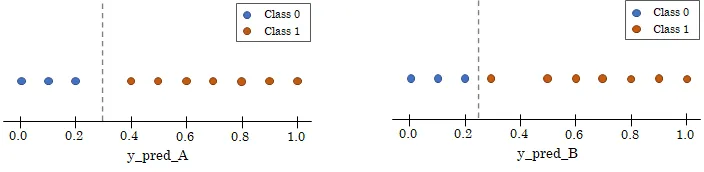

Model A improves prediction probability leading to a decline in log-loss score, but it does not mean a change in AUC score, as long as the degree of distinction is the same, AUC will be the same.

However, an increase in AUC always decreases log-loss. This is because higher seperation implies that predictions are improved (predictions are pulled closer to their respective classes). 



Sources:

1)https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/#:~:text=Recall%20is%20a%20metric%20that,indication%20of%20missed%20positive%20predictions.

2)https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/scorers.html#:~:text=The%20F2%20score%20is%20the,to%20recall%20than%20to%20precision.

3)https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a

4)https://towardsdatascience.com/intuition-behind-roc-auc-score-1456439d1f30

***Let's implement a correlation program from scratch to look at the correlations between
the features of Admission_Predict_Ver1.1.csv dataset file from Kaggle***



In [1]:
import numpy as np
import math

def correlate(X, y):
    mean_X = np.sum(X)/len(X)
    mean_y = np.sum(y)/len(y)
    
    part_x = X - mean_X
    part_y = y - mean_y
    
    covariance = np.sum(np.dot(part_x, part_y))
    sdv_x = math.sqrt(np.sum(np.dot(part_x, part_x)))
    sdv_y = math.sqrt(np.sum(np.dot(part_y, part_y)))
    
    corr_coef = covariance/(sdv_x * sdv_y)
    
    return corr_coef

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np
import pandas as pd

# Locate and load the data file
df = pd.read_csv('./EP_datasets/Admission_Predict_Ver1.1.csv')

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=500, M columns=9


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
matrix_cor = np.zeros((len(df.columns), len(df.columns)))
matrix_cor 

count_row = 0
for col in df.columns:
    X = df[col].to_numpy()
    count_col = 0
    for col in df.columns:
        y = df[col].to_numpy()
        value = correlate(X, y)
        matrix_cor[count_row, count_col] = value
        count_col = count_col + 1
    count_row = count_row + 1

matrix_cor


array([[ 1.        , -0.1038387 , -0.141696  , -0.06764057, -0.13735197,
        -0.00369445, -0.07428899, -0.00533169,  0.00850505],
       [-0.1038387 ,  1.        ,  0.8272004 ,  0.63537621,  0.61349767,
         0.52467939,  0.82587795,  0.56339812,  0.81035064],
       [-0.141696  ,  0.8272004 ,  1.        ,  0.6497992 ,  0.64441039,
         0.5415633 ,  0.81057354,  0.46701206,  0.79222761],
       [-0.06764057,  0.63537621,  0.6497992 ,  1.        ,  0.72802357,
         0.60865071,  0.70525435,  0.42704745,  0.69013237],
       [-0.13735197,  0.61349767,  0.64441039,  0.72802357,  1.        ,
         0.66370685,  0.71215432,  0.40811585,  0.68413652],
       [-0.00369445,  0.52467939,  0.5415633 ,  0.60865071,  0.66370685,
         1.        ,  0.63746921,  0.3725256 ,  0.64536451],
       [-0.07428899,  0.82587795,  0.81057354,  0.70525435,  0.71215432,
         0.63746921,  1.        ,  0.501311  ,  0.88241257],
       [-0.00533169,  0.56339812,  0.46701206,  0.42704745,  0

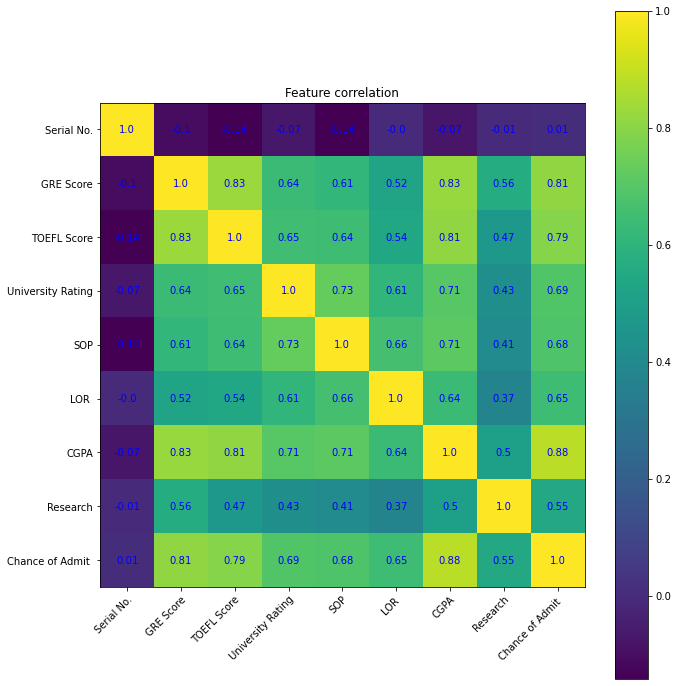

In [4]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

features = list(df.columns)


fig, ax = plt.subplots( figsize = (10,10))
im = ax.imshow(matrix_cor)

cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(features)), labels=features)
ax.set_yticks(np.arange(len(features)), labels=features)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(features)):
    for j in range(len(features)):
        text = ax.text(j, i, round(matrix_cor[i, j],2),
                       ha="center", va="center", color="b")

ax.set_title("Feature correlation")

fig.tight_layout()
plt.show()

Now I will verify that my method works by using one of numpy's metrics tools. np.corrcoef, this example was pulled and adapted from the textbook (pg.324).

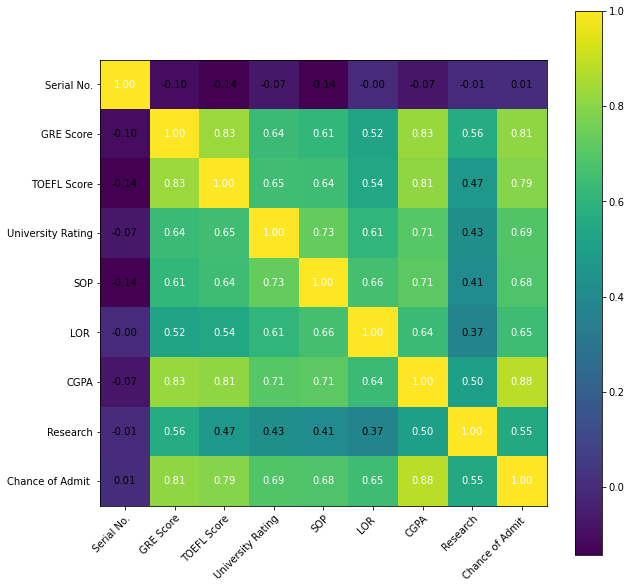

In [5]:
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[features].values.T)
hm = heatmap(cm,
             row_names = features,
             column_names = features, figsize=(10,10))
plt.show()

***Should we use 'Serial no'?***

No, Serial no has no correlation with any of the other feature, and only a statistically insignificant correlation with chance of admit.

***Observe that the diagonal of this matrix should have all 1's and explain why?***

The diagonal of this matrix has all 1's, because we are comparing a feature vector with itself. The data will be identical and thus fully correlated. 

Mathematically speaking since the Pearson's correlation coefficiant is calculated as the covaraince between two features divided by the product of their standard deviations, since the standard deviations of both identical features is the same, we are essentially squaring the standard deviations. Standard deviation squared is equal to the variance. So we end up dividing the variance by itself, so it will always be equal to 1.

***Since the last column can be used as the target (dependent) variable, what do you think about the correlations between all the variables?***

cGPA, GRE score, TOEFL scores are the strongest in correlation to the dependent variable. University rating, SOP, LOR are moderately correlated. Research to a lesser extent. I was surprised that Research is much lower. The chance of admission to graduate school seems most dependent on academic evaluation and scoring. 

***Which variable should be the most important for prediction of 'Chance of Admit'?***

The most important variable for prediction should be cGPA as it has the highest correlation. 

Still its important to explore the nature of the relationship between cGPA and Chance of Admit, and all the other features with strong correlation that we decide to use in our model. For example, high correlation may still not be suitable for a linear regression model, if the relationship between the independent and dependent feature is non-linear.